<h1 align="center">Actividad 2: Agrupar datos textuales con el Modelo de Tópicos y el algoritmo Latent Dirichlet Allocation (LDA)</h1>

In [8]:
!python3 -V

Python 3.5.3


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta actividad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
    <li>Biblioteca <a href="http://scikit-learn.org/stable/install.html/">SciKit-learn</a> de Python</li>
    <li>Código disponible en  <a href="https://github.com/lda-project/lda/">lda-project</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.)
</p>
</div>

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en saber explorar la estructura oculta de un conjunto de datos textuales.</p>
<p> Comenzaremos por utilizar un  algoritmo de clustering tradicional como Kmeans para explorar datos textuales, considerando la medida tf-idf por cada término presente en cada texto, para caracterizar los textos y construir distancias entre ellos.</p>
<p>En una segunda fase utilizaremos el <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a> para descubrir tópicos en los textos. Para ello se utilizará el algoritmo de asignación de tópicos latentes conocido como <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW">Latent Dirichlet Allocation (LDA)</a>. El enfoque es probabilista, por lo que el resultado del algoritmo es descubrir tópicos en los textos (el número de tópicos es definido por el analista) y asignar una distribución de probabilidad de tópicos en cada texto.</p>  Dependiendo del tamaño de los textos, es también posible agruparlos de acuerdo al tópico con mayor representación en cada uno, lo que permitirá comparar esta metodología con los algoritmos de clustering clásicos.</p> </div>
    
  

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<p>En el primer ejemplo se busca encontrar estructuras ocultas en el discurso de Donald Trump. Con este objetivo, vamos a utilizar un dataset de 297 tweets publicados por Donald Trump entre el 5 diciembre 2016 y el 27 de enero 2017 (aproximadamente 1 mes después su elección).</p>   
<p>El primer paso es la lectura de datos: </p></div>

In [51]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Cargar el dataset de tweets
df_tweets = pd.read_csv('datasets/trump_tweets.csv')
df_tweets

,Date,Time,Tweet,Tweetid
0,2016-12-05 13:53:11+00:00,13:53:11,I am thrilled to nominate Dr. @RealBenCarson a...,805772007220645000
1,2016-12-05 16:00:27+00:00,16:00:27,If the press would cover me accurately &amp; h...,805804034309427000
2,2016-12-05 23:06:43+00:00,23:06:43,#ThankYouTour2016 \r\n\r\n12/6- North Carolina...,805911307270713000
3,2016-12-06 13:52:35+00:00,13:52:35,Boeing is building a brand new 747 Air Force O...,806134244384899000
4,2016-12-06 16:45:27+00:00,16:45:27,"Join me tonight in Fayetteville, North Carolin...",806177746397306000
5,2016-12-06 19:09:49+00:00,19:09:49,Masa (SoftBank) of Japan has agreed to invest ...,806214078465245000
6,2016-12-06 19:10:27+00:00,19:10:27,Masa said he would never do this had we (Trump...,806214236053667000
7,2016-12-06 21:17:45+00:00,21:17:45,Departing New York with General James 'Mad Dog...,806246271405162000
8,2016-12-07 03:33:20+00:00,3:33:20,"A great night in Fayetteville, North Carolina....",806340792247795000
9,2016-12-07 12:18:56+00:00,12:18:56,I will be interviewed on the @TODAYshow at 7:3...,806473064703725000


In [52]:
#selección de los mensajes
docs = df_tweets["Tweet"].as_matrix()
len(docs)


297

In [53]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score

stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


[nltk_data] Downloading package stopwords to /home/gauss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gauss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


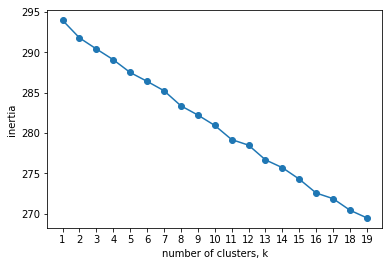

In [12]:
#Utilizando Kmeans y tf-idf para realizar un primer agrupamiento de los mensajes
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english',tokenizer=tokenize_and_stem, ngram_range=(1,2)) 
X = vectorizer.fit_transform(docs)

# set.seed()
num_k = range(1, 20)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init = 20, max_iter=20)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Pregunta Nº1: Explore las clases TfidfVectorizer, CountVectorizer. ¿Qué rol cumplen? ¿Qué tratamiento premilinar de textos se ha hecho en este caso? ¿Qué rol cumple n-gram? </b></p>
<p>
R: CountVectorizer: convierte una colección de documentos de texto en una matriz de recuento (frecuencia) de términos o tokens.<br>
TfidfVectorizer: convierte una colección de documentos de texto en una matriz de características (features) TF-IDF. Es equivalente a CountVectorizer seguido de TfidfTransformer.<br><br>
Adicionalmente:<br>
TfidfTransformer: transforma una matriz de recuento (frecuencia) en una representación TF o TF-IDF normalizada.<br>
TF: frecuencia de término; TF-IDF: frecuencia de término-frecuencia inversa de documento (la frecuencia de ocurrencia del término en la colección de documentos).<br><br>
El texto se trató preliminarmente filtrando los caracteres no alfabéticos y reduciendo cada palabra a su raíz (haciendo "stemming" (eliminando los afijos de las palabras)).<br><br>
ngram_range permite configurar los límites inferior y superior del rango de n valores para diferentes n-gramas que se extraerán. Se usan todos los valores de n tales que min_n <= n <= max_n.<br>
* N-grama puede definirse como la subsecuencia de n elementos consecutivos en una secuencia.<br>
Al usar ngram_range=(1,2), se dice que se contarán  unigramas (palabras de una en una) y bigramas (palabras de dos en dos).</p>
<p><b>Pregunta Nº2: A partir del gráfico, justifique el número de clusters para estos datos.</b></p>
<p>R: El número de clusters a generar debiera ser 6. La justificación: al parecer no existe un método matemático para justificar "elbow" y se hace visualmente. Visualmente, en el valor 7 hay una "baja" de "tendencia" de inercia, por lo que se toma el valor anterior, en este caso,  6.
</p>
</div>

Top terms per cluster:
Cluster 0: polit russia togeth bring world total oppon great noth obamacar fake news dem fake republican problem
Cluster 1: amp time u.s. john build state mexico big help tomorrow great kennedi begin live support
Cluster 2: thank d.c. wonder washington washington d.c. https inaugur great job honor time american peopl day thank wonder
Cluster 3: interview enjoy tonight p.m. foxnew abc todayshow todayshow enjoy interview todayshow minut interview foxnew foxnew p.m. p.m. enjoy davidmuir foxandfriend enjoy
Cluster 4: https thankyoutour2016 join ticket ticket https trump mobil alabama mobil alabama iowa thankyoutour2016 ticket inauguration2017 inauguration2017 https danscavino way
Cluster 5: peopl n't elect just vote state whi did bad hack like wrong cnn report know
Cluster 6: make america new https happi realdonaldtrump look rt job make america 's great year america great forward


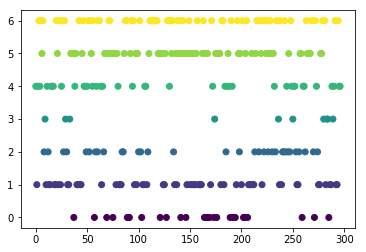

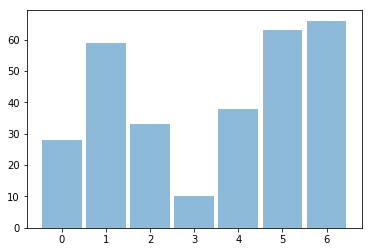

In [54]:
from matplotlib.pylab import hist, show
true_k = 7 # como enla iteracion se usa "range", debe darse k "optimo" + 1
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=5)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    cluster_words = np.array(terms)[order_centroids[i, :15]]
    print('Cluster {}: {}'.format(i, ' '.join(cluster_words)))

#Generando algunos gráficos de los resultados
labels = model.predict(X)
plt.scatter(range(297),labels,c=labels)
show()
hist(labels,bins=np.arange(-0.5,6.7,1),alpha=0.5,rwidth=0.9)
show()

                                    

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Pregunta Nº2:Explore diversos valores en los parametros n_init y max_iter. ¿Tienen influencia en los resultados? Describa e interprete los resultados.</b></p>
<p>
R: Al variar los parámetros de ejecución (inicializaciones e iteraciones) se obtienen resultados distintos; ni siquiera puede advertirse una tendencia. Cuesta interpretar los resultados, a lo más, en algunas oportunidades aparece un cluster con varios conceptos que podrían estar relacionados con "fake news".</p>
</div>

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>En lo que sigue se construye un modelo probabilista de tópicos, considerando 9 tópicos (para comparar con Kmeans
 y el algoritmo LDA estimado con el <a href="https://drive.google.com/open?id=1AoCcmg91Y1yRwM_Ox4Nvf6PGSQ9TybpE">, método de Bayes Variacional</a>, disponible como desarrollo en <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">sklearn-lda.</a></p> 
Previo a ello se utiliza la clase CountVectorizer y su función fit_transform que permite construir una matriz tf (DTM, Document-Term Matrix) que contiene la frecuencia de aparición de cada término del vocabulario en cada texto analizado. En la definición de la clase se especifica que:
<ol>
    <li>los términos que  aparecen sólo una vez en algún texto no serán considerados en el vocabulario (min_df=2)</li>
    <li> los términos que  aparecen en mas del 95% de los textos no serán considerados en el vocabulario (max_df=0.95)</li>
    <li> se utilizará un conjunto de stop words del inglés </li>
</ol></div>

In [55]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words='english',tokenizer=tokenize_only, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(docs)
diccionario= tf_vectorizer.get_feature_names()

#Estimación de LDA con Bayes Variacional
lda = LatentDirichletAllocation(n_components=true_k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)
#Cálculo de índice de ajuste de los datos
print(lda.perplexity(tf))
print("\nTopics in LDA model:")
print_top_words(lda, diccionario, 10)


1198.2905137276923

Topics in LDA model:
Topic #0: https thank great bring jobs thankyoutour2016 join ratings tickets tickets https
Topic #1: states today time vote did registered vote registered united people long
Topic #2: u.s. mexico tonight meeting ceo trade massive general ford border
Topic #3: president https president obama obama terrible happy weak released said happy birthday
Topic #4: great people day enjoy news interviewed 20th house wall january
Topic #5: people new just jobs america executives n't american plants great
Topic #6: n't amp fake news fake just news cnn trump election does



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<b><p>Pregunta Nº4: Indage sobre la medida perplexity, ¿Cómo se interpreta el valor obtenido?</b></p>
<p>R: Perplexity o perplejidad podría definirse/interpretarse como la medida de que tan bien un modelo de probabilidad predice una muestra. Si se tiene perplejidad baja, puede asumirse que el modelo es bueno prediciendo una muestra.</p>
</div>

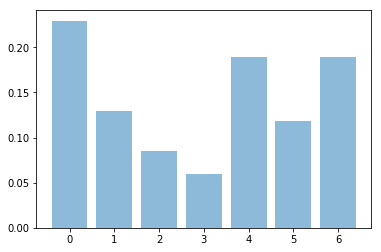

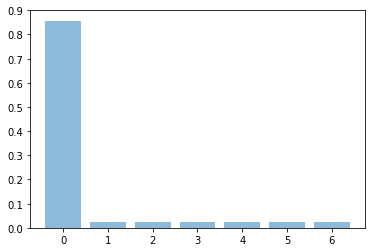

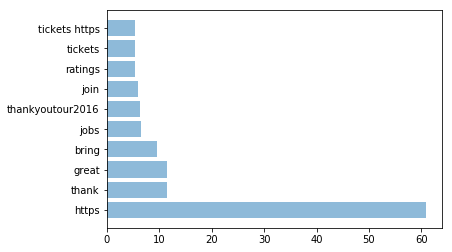

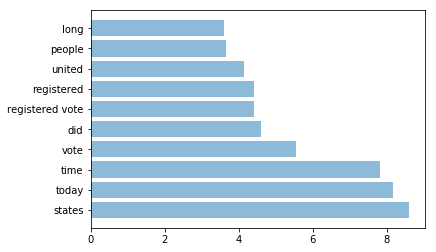

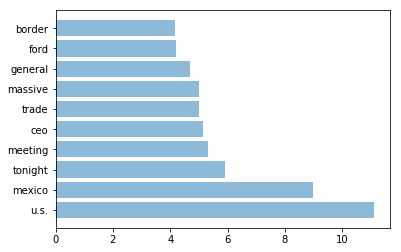

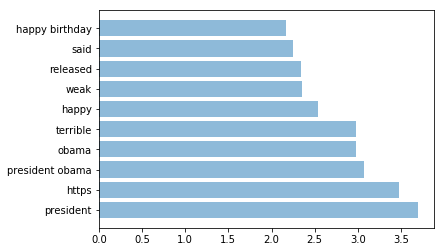

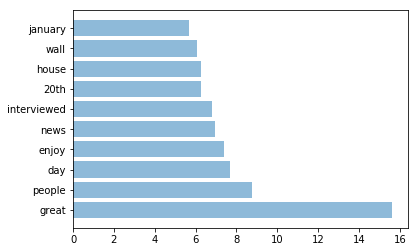

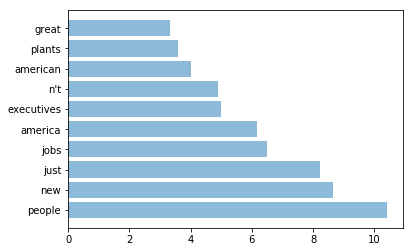

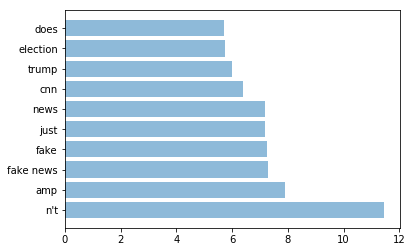

In [56]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)

#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 190
plt.bar(w,height=y[190],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Pregunta Nº5: Interprete estos gráficos.</b></p>
<p>R: El primer gráfico representan la distribución de los tópicos para todos los documentos; el segundo, para el documento número 190.<br>Para todos los documentos, el tópico dominante es el 0 y el menos presente, el 3.<br>Para el documento número 190, el tópico 0 es aún más dominante.<br>
En los demás gráficos se muestra la distribución de frecuencia de cada palabra dentro de cada tópico.<br>Se ve, por ejemplo, que para el tópico 0, las palabras que más se repite es "https", lo que puede ser un indicador de que falta retirar palabras no útiles (stopwords) de los documentos.</p></div>

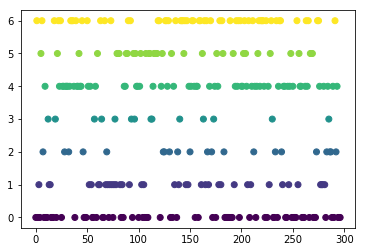

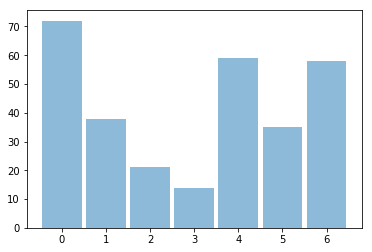

In [57]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(docs)):
    z.append(np.argmax(y[i]))
plt.scatter(range(297),z,c=z)

#distribución de cluster de acuerdo al cálculo anterior
show()
hist(z,bins=np.arange(-0.5,6.7,1),alpha=0.5,rwidth=0.9)#,density=True)
show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Pregunta Nº6: ¿Cómo se comparan estos resultados con los de  Kmeans?</b></p>
<p>R: Para este experimento, el "significado" de los tópicos es bastante similar, vale decir, en ambos no puede descubrirse mucho. Para la distribución de tópicos en los documentos, los resultados también son bastante similares.</p>
</div>


<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Una nueva estimación para algoritmo LDA considerando <a href="https://drive.google.com/open?id=1oSRRvG_W0UaH0l4o9f5ClEyWuGY1j-s0"> Gibbs Sampling</a>, disponible como desarrollo en <a href="https://github.com/lda-project/lda/">lda-project.</a></p> 
</div>

In [60]:
import logging
import sys
import lda
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

model = lda.LDA(n_topics=true_k, n_iter=5000, alpha=0.1, eta=0.1, random_state=1)
model.fit(tf)  # model.fit_transform(X) is also available

topic_word = model.topic_word_  # model.components_ also works
n_top_words=10
topic_words = []

#print(len(np.array(diccionario)))

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(diccionario)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    


/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


Topic 0: just people n't election president wrong states called does hillary
Topic 1: https join thankyoutour2016 tickets https tickets alabama great trump mobile north
Topic 2: u.s. united mexico jobs big meeting new wall country ford
Topic 3: news time great amp fake fake news d.c. people john want
Topic 4: https great thank america today jobs trump make make america going
Topic 5: media report bad like did russia dishonest n't dishonest media big
Topic 6: https happy rt new realdonaldtrump forward wonderful year 's tonight


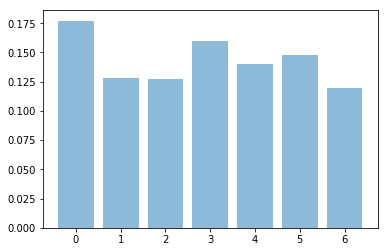

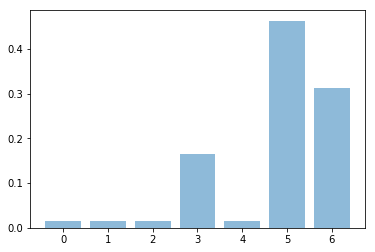

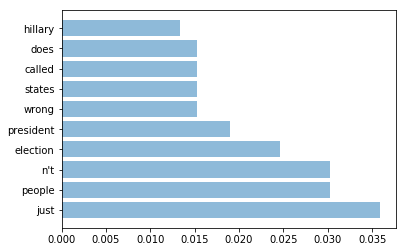

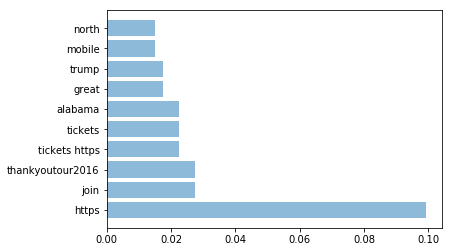

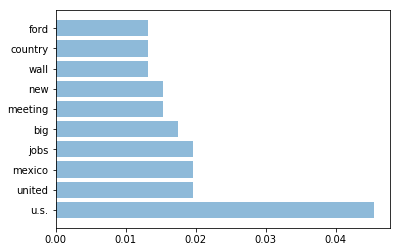

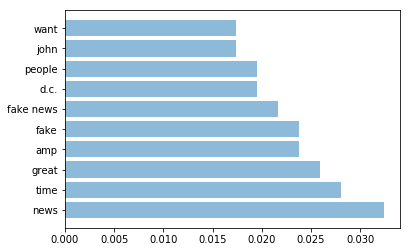

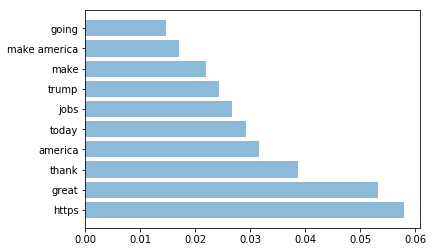

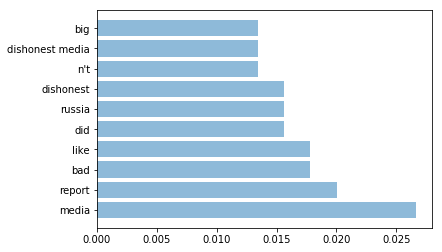

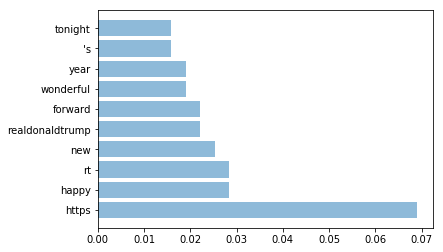

In [64]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[100],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()





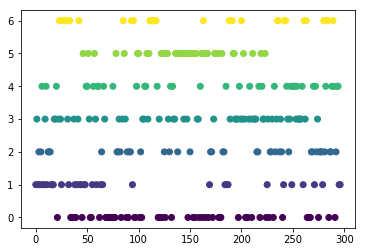

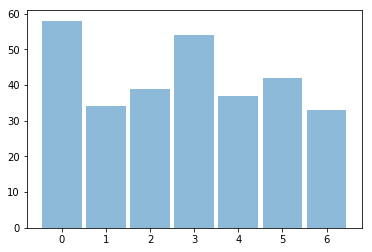

In [65]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(docs)):
    z.append(np.argmax(y[i]))
plt.scatter(range(297),z,c=z)
show()

#distribución de cluster de acuerdo a la definición anterior
hist(z,bins=np.arange(-0.5,6.7,1),alpha=0.5,rwidth=0.9)#,density=True)
show()



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Pregunta Nº7: ¿Cómo se comparan estos resultados con los anteriores? ¿Qué puede decir de la convergencia de la estimación en este caso?</b></p>
<p>R: En cuanto al significado de los tópicos, los resultados son bastante similares. La distribución de tópicos en los documentos, eso sí, es bastante más equitativa lo que puede interpretarse como que representan de mejor forma los documentos.</p></div>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Considerando este ejemplo realice el análisis de tópicos del set de datos en speeches.csv. 
Comente sus hallazgos</b></p> </div>

In [72]:
df_speeches = pd.read_csv('datasets/speeches.csv')
docs = df_speeches["text"].as_matrix()

tf_vectorizer =  CountVectorizer(max_df=0.95, min_df=0.1, tokenizer=tokenize_only, stop_words=stopwords, ngram_range=(1, 2))

tf = tf_vectorizer.fit_transform(docs)
tf_feature_names = tf_vectorizer.get_feature_names()


In [73]:
import lda

model = lda.LDA(n_topics=true_k, n_iter=3000, alpha=0.1, eta=0.1, random_state=3)
model.fit(tf) 

topic_word = model.topic_word_  
n_top_words=10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(tf_feature_names)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


Topic 0: great states united states united war without every may made time
Topic 1: must government one country peace progress world new national economic
Topic 2: us america new must let world time today work let us
Topic 3: freedom world nation peace life free nations 's men shall
Topic 4: upon shall government law laws congress american may must business
Topic 5: constitution states government union power upon may one would state
Topic 6: public country every government us duties interests fellow-citizens shall rights


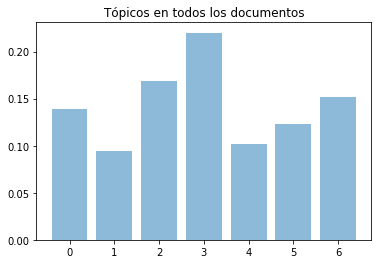

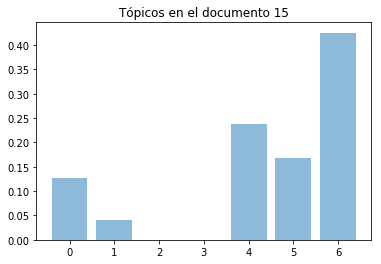

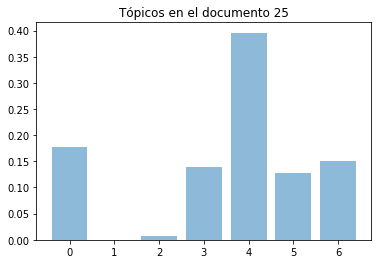

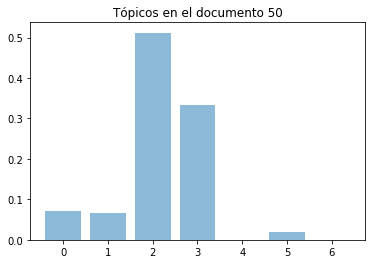

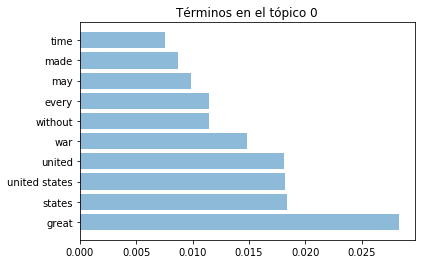

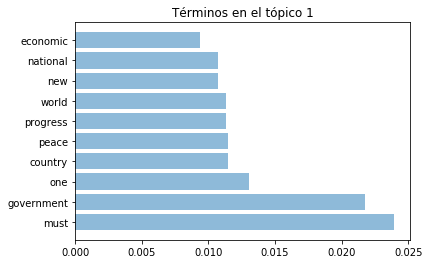

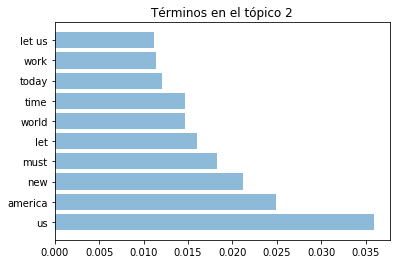

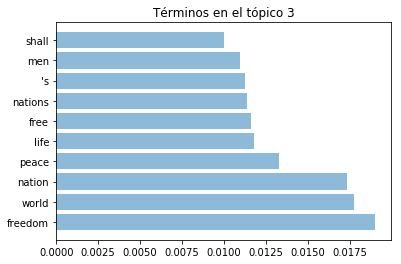

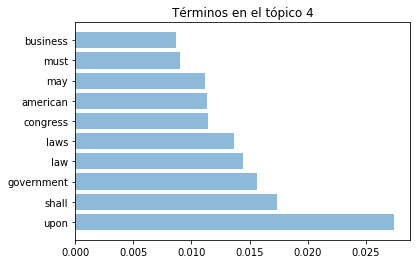

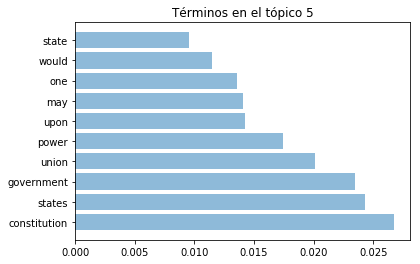

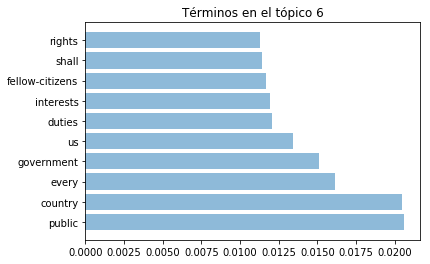

In [86]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
plt.title('Tópicos en todos los documentos')
show()

#distribución de tópicos en el documento 15
plt.bar(w,height=y[15],alpha=0.5,tick_label=w)
plt.title('Tópicos en el documento 15')
show()
#distribución de tópicos en el documento 25
plt.bar(w,height=y[25],alpha=0.5,tick_label=w)
plt.title('Tópicos en el documento 25')
show()
#distribución de tópicos en el documento 50
plt.bar(w,height=y[50],alpha=0.5,tick_label=w)
plt.title('Tópicos en el documento 50')
show()

#frecuencia de palabras por tópico
n_top_words=10
numow =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(tf_feature_names[i])
          d.append(topic[i])
    
    plt.barh(numow,width=d,alpha=0.5,tick_label=s)
    plt.title('Términos en el tópico ' + str(idx))
    show()



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6; padding: 5px;">
<p><b>Hallazgos</b></p>
<p>R: Se pudieron obtener resultados interesantes, muy rápido. La distribución de tópicos en los documentos no presenta alguna inclinación por alguno(s) (fluctuan entre 9,5 y 22%). Los términos de los tópicos permiten inferir acerca de su sentido. Tal vez la diferencia con los experimentos anteriores radica en la naturaleza de los datos: datos más "limpios" y más contextualizados.  </p>
</div>